In [31]:
# выберем те признаки, которые имеют корреляцию с целевым признаком Diabetes, >= 0,24.
high_corr_features = features[features >= 0.024].index
print(high_corr_features)

Index(['AnyHealthcare', 'Sex', 'Smoker', 'MentHlth', 'CholCheck', 'Stroke',
       'PhysHlth', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'BMI',
       'DiffWalk', 'HighBP', 'GenHlth', 'Diabetes'],
      dtype='object')


In [ ]:
# Исследуем выбросы (IQR)

In [ ]:
Dealing with outliers - IQR (The interquartile range)

In [ ]:
# Создадим, обучим и оценим модель случайного леса для предсказания наличия диабета

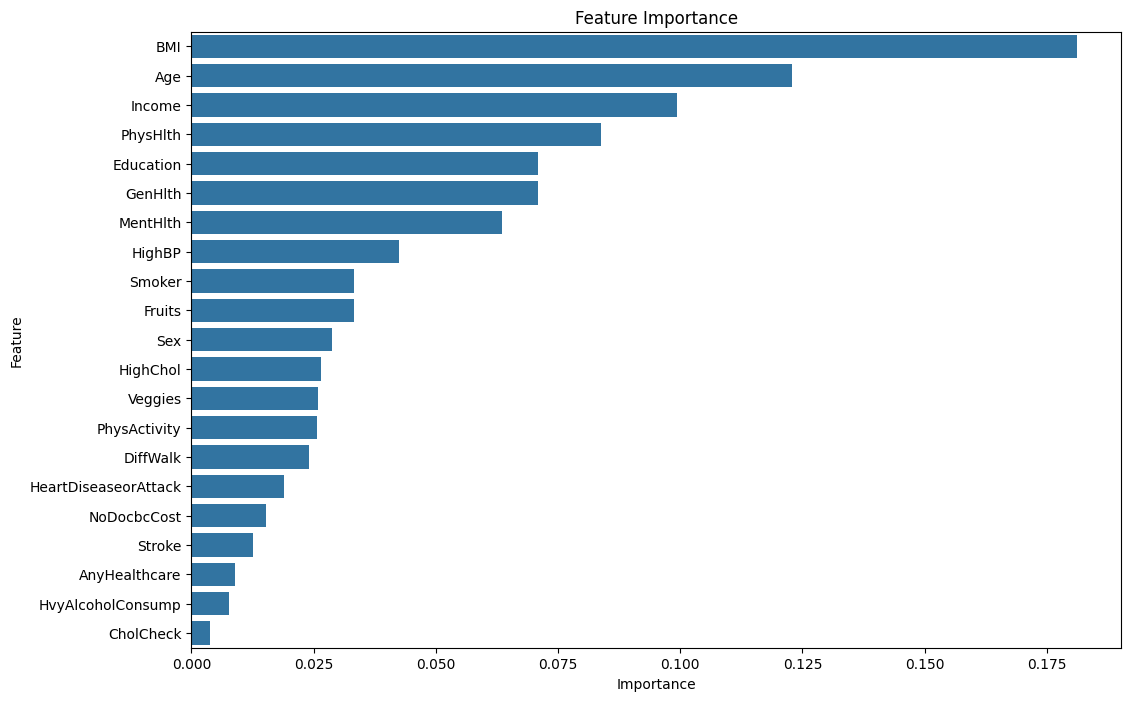

Accuracy: 0.8601781772311574
Confusion Matrix:
[[63634  1971]
 [ 8670  1829]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65605
         1.0       0.48      0.17      0.26     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104


Top factors influencing diabetes prediction:
      Feature  Importance
3         BMI    0.181192
18        Age    0.122963
20     Income    0.099427
15   PhysHlth    0.083703
19  Education    0.070948


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Загрузим датасет
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/Kursach/diabetes_binary_health_indicators_BRFSS2015.csv', sep=",")

# Подготовка данных для моделирования
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозы
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Важность признаков
feature_importances = model.feature_importances_
features = X.columns

# Создание DataFrame для удобства
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'\nTop factors influencing diabetes prediction:\n{feature_importance_df.head()}')